In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

from string import punctuation
import nltk
from nltk.corpus import stopwords

#Preprocessing
from scipy.stats import uniform
from scipy import interp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


#predictive model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import io
df = pd.read_csv('Restaurant.csv',usecols=['Name','Rating','Tweet','cuisines','Sentiment','Current_Rating'] )
df.head()

,Name,Rating,Tweet,cuisines,Sentiment,Current_Rating
0,Sandwich Shop,3.5,Average safe food. Not got ill. #FOODSAFE,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.5
1,Sandwich Shop,2.8,Chicken inside the sandwich was #rotten and wa...,"North Indian, European, Mediterranean, BBQ, Kebab",1,2.8
2,Sandwich Shop,4.0,#SouthIndian sambhar tasted fantastic. Got eas...,"North Indian, European, Mediterranean, BBQ, Kebab",1,4.0
3,Sandwich Shop,2.0,#VEGMEAL took life of 5 children. #FOODSAFETY,"North Indian, European, Mediterranean, BBQ, Kebab",0,2.0
4,San Churro Cafe,3.2,#SouthIndian bada caused me #StomachAche and #...,"North Indian, European, Mediterranean, BBQ, Kebab",1,3.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3013 non-null   object 
 1   Rating          3013 non-null   float64
 2   Tweet           3013 non-null   object 
 3   cuisines        2835 non-null   object 
 4   Sentiment       3013 non-null   int64  
 5   Current_Rating  3013 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 141.4+ KB


In [4]:
#get the stopwords and punctuation
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
punc = list(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suldutta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
text_clean = []
for i in range(len(df.Tweet)):
    char_clean = []
    for char in str(df['Tweet'][i]).split():
        char = char.lower()
        if char not in stop:
            char_clean.append(char)
        else:
            continue
    char_clean = ' '.join(char_clean)
    text_clean.append(char_clean)
df['Tweet'] = text_clean

In [6]:
#remove punctuations
text_clean = []
for i in range(len(df.Tweet)):
    char_clean = []
    for char in df['Tweet'][i]:
        char = char.lower()
        if char not in punc:
            char_clean.append(char)
        else:
            continue
    char_clean = ''.join(char_clean)
    text_clean.append(char_clean)
df['Tweet'] = text_clean

In [7]:
#show text sample
df.Tweet[2]

'southindian sambhar tasted fantastic got easily digested goodfood'

In [8]:
#split the data
X = df.Tweet
y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
#RandomSearchCV
# define the parameters to tune

param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10),
              'n_jobs': range(1,5)}

rs = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=3) #25 iterations

In [18]:
model  = Pipeline([
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', rs)
])

In [11]:
#fit the data
model.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model',
                 RandomizedSearchCV(estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            gro...
                                                            random_state=None, ...),
                                    n_iter=3,
                                    param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E65DC8C340>,
                                                         'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E65DC8D180>,
                                                         'max_depth': range(1, 50),
                                                         'min_child_weight': range(1, 10),
                                                         'n_estimators': range(1, 300),
                                                         'n_jobs': range(1, 5)}))])

In [12]:
#predict the test data
predictions=model.predict(X_test)

In [13]:
def predict_xgboost(x):
 l=[]
 l.append(x) 
 x1=model.predict(l)
 if(x1==1):
   print("positive Statement")
 else:
   print("Negative Statement")
print("Enter a Statement")
text=input()
predict_xgboost(text)


Enter a Statement
Raw food! #eww KFC
Negative Statement


In [14]:
print('Model Accuracy: ', round(accuracy_score(y_test, predictions)*100,2), '%')

Model Accuracy:  95.36 %


In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       268
           1       0.98      0.94      0.96       335

    accuracy                           0.95       603
   macro avg       0.95      0.96      0.95       603
weighted avg       0.95      0.95      0.95       603



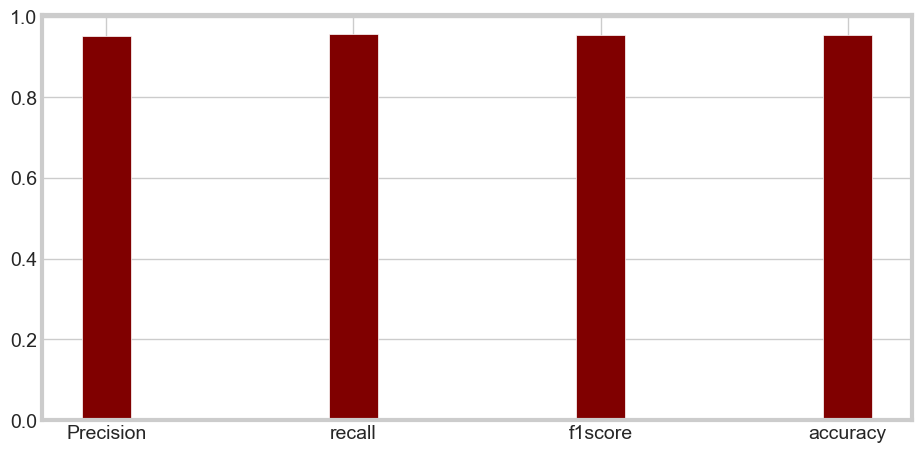

In [16]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, output_dict=True )
macro_precision=  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
accuracy = report['accuracy']
from sklearn.metrics import precision_recall_fscore_support as score
data = {'Precision':macro_precision, 'recall':macro_recall, 'f1score':macro_f1,'accuracy':accuracy}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',width = 0.2)
plt.show()

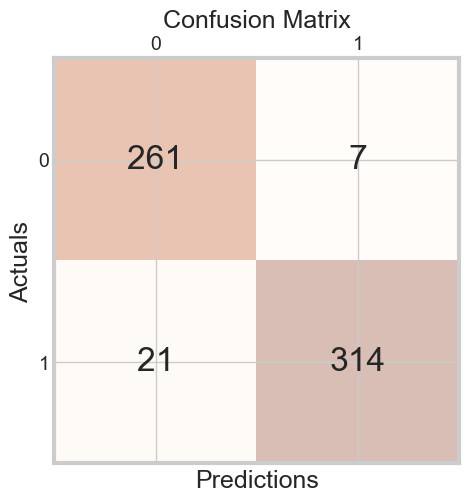

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()